In [1]:

import os.path as osp
shared_folder = osp.abspath(osp.join('..', '..', 'share'))
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join('..', 'data')),
    saves_folder_path=osp.abspath(osp.join('..', 'saves'))
)

# Import needed libraries
%pprint
sys.path.insert(1, '../py')
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from matplotlib.patches import Rectangle

Pretty printing has been turned OFF


In [3]:

generations_df = nu.load_object('generations_df')
turning_numbers_df = nu.load_object('turning_numbers_df')
turnings_df = nu.load_object('turnings_df')

In [4]:

us_presidents_df = nu.load_object('us_presidents_df')

In [15]:

us_presidents_df.sample(10).dropna(axis='columns', how='all').T.sample(20)

President,James Buchanan,Joe Biden,Calvin Coolidge,Ronald Reagan,Herbert Hoover,James Monroe,Abraham Lincoln,Barack Obama,Andrew Johnson,Chester A. Arthur
turning_year_begin,1773.0,1929.0,1865.0,1908.0,1865.0,1746.0,1794.0,1963.0,1794.0,1822.0
relations_with_congress,42.0,NaN,24.0,6.0,33.0,8.0,4.0,31.0,44.0,33.0
date_of_birth,1791-04-23 00:00:00,1942-11-20 00:00:00,1872-07-04 00:00:00,1911-02-06 00:00:00,1874-08-10 00:00:00,1758-04-28 00:00:00,1809-02-12 00:00:00,1961-08-04 00:00:00,1808-12-29 00:00:00,1829-10-05 00:00:00
Parent,NaN,NaN,John Calvin Coolidge Sr. (father),NaN,NaN,NaN,NaN,NaN,NaN,William Arthur (father)
presidential_luck,42.0,NaN,13.0,3.0,43.0,6.0,18.0,15.0,40.0,17.0
presidential_intelligence,39.0,NaN,33.0,31.0,13.0,18.0,2.0,9.0,42.0,36.0
presidential_imagination,44.0,NaN,37.0,18.0,36.0,15.0,1.0,11.0,43.0,32.0
overall_ability,43.0,NaN,33.0,18.0,29.0,17.0,1.0,15.0,42.0,35.0
Spouses,NaN,Neilia Hunter ​ ​(m. 1966; died 1972)​ Jill Ja...,NaN,Jane Wyman ​ ​(m. 1940; div. 1949)​ Nancy Davi...,NaN,NaN,NaN,NaN,NaN,NaN
leadership_ability,44.0,NaN,38.0,7.0,36.0,12.0,2.0,16.0,43.0,34.0


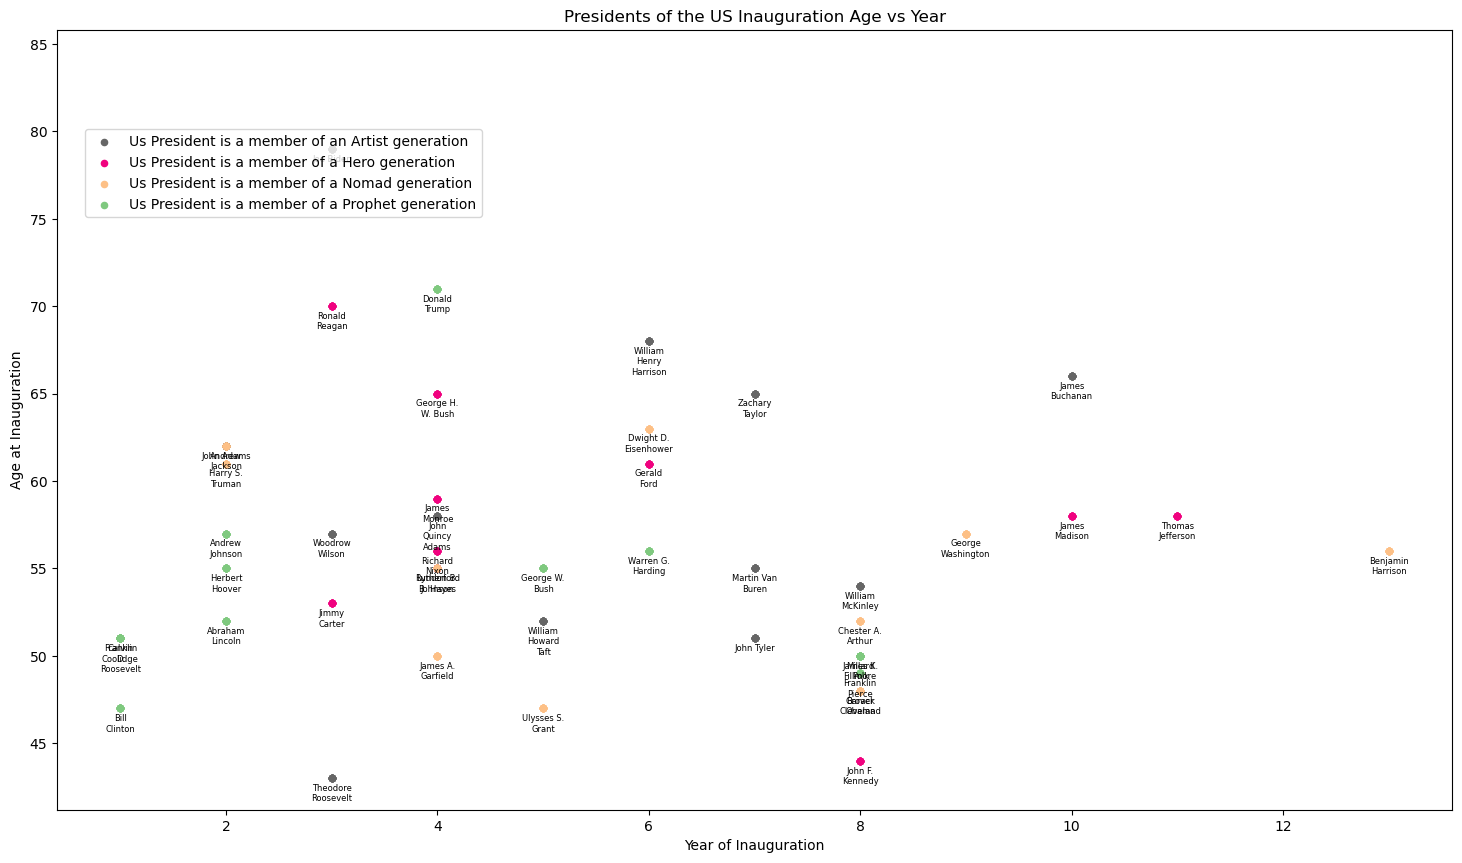

In [16]:

df1 = turnings_df.reset_index()
df2 = generations_df.reset_index()
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=us_presidents_df, groupby_column_name='turnings_archetype', xname='siblings_count', leader_designation='US President',
    label_infix='is a member of', label_suffix='generation', info_df=df3,
    title_prefix='Presidents of the US'
)

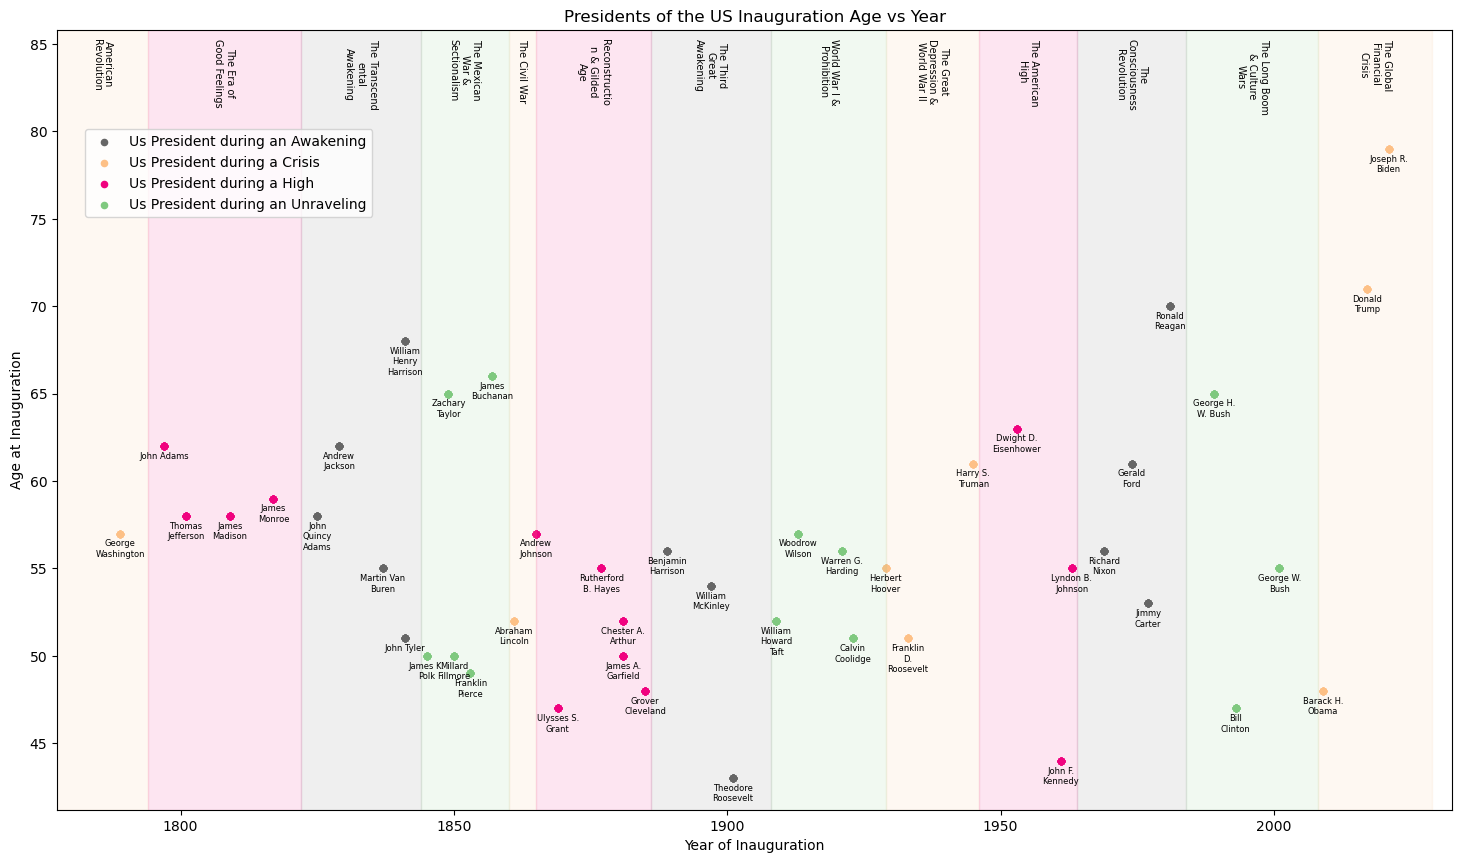

In [6]:

df1 = turnings_df.reset_index()
df2 = turning_numbers_df.reset_index().rename(columns={'index': 'turning_number'})
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
df4 = generations_df.reset_index()
on_list = list(set(df3.columns).intersection(set(df4.columns)))
df5 = df3.merge(df4, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=us_presidents_df, groupby_column_name='turning_type', xname='year_term_begin', leader_designation='US President',
    label_infix='during', label_suffix='', info_df=df5,
    title_prefix='Presidents of the US'
)

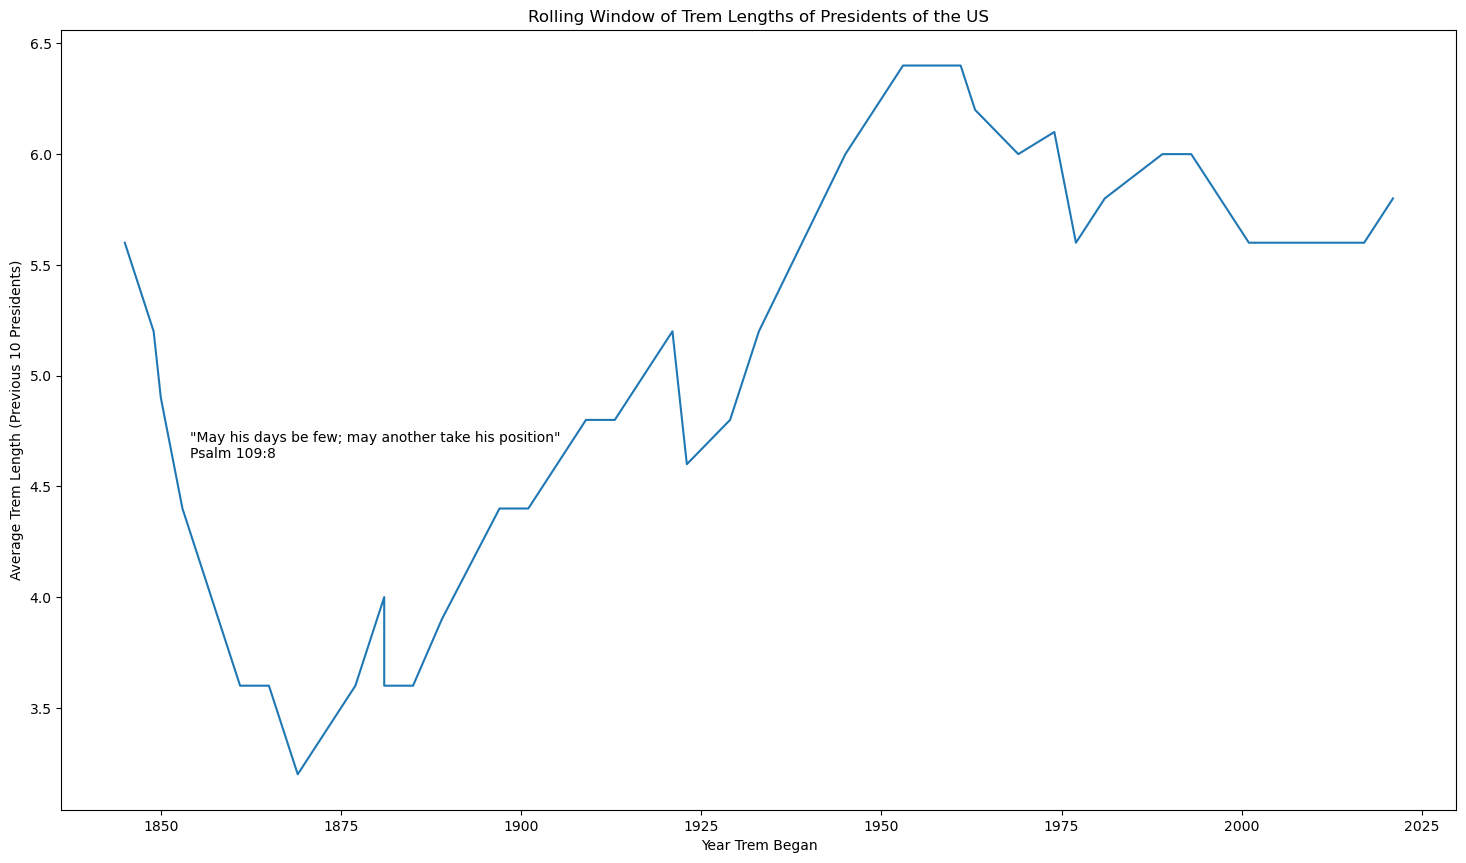

In [15]:

# Calculate the diff of the year_term_begin column
df = us_presidents_df.year_term_begin.sort_values().to_frame()
df['year_term_begin_diff'] = df.year_term_begin.diff()

# Plot a rolling window of the year_term_begin_diff column
figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
ax.plot(df.year_term_begin, df.year_term_begin_diff.rolling(window=10).mean())

# Set the title and labels
ax.set_title('Rolling Window of Trem Lengths of Presidents of the US')
ax.set_xlabel('Year Trem Began')
ax.set_ylabel('Average Trem Length (Previous 10 Presidents)')

# Make a comment about the 1500s
annotation_str = '"May his days be few; may another take his position"\nPsalm 109:8'
ax.annotate(text=annotation_str, xy=(1854, 4.75), xytext=(1854, 4.75), verticalalignment='top',
            horizontalalignment='left', fontsize=10);

In [8]:

generations_df.sample(5).T

generation_name,Humanist,Lost,Alpha,Millennial,Missionary
childhood_turning_entered,4,2,1,3,1
saeculum_name,Late Medieval,Great Power,Meta Modern,Millennial,Great Power
turnings_archetype,Artist,Nomad,Prophet,Hero,Prophet
generations_archetype,Adaptive,Reactive,Idealist,Civic,Idealist
birth_year_begin,1461,1883,2024,1982,1860
birth_year_end,1482.0,1900.0,2042.0,2004.0,1882.0
childhood_turning_description,War of the Roses,"Missionary Awakening, Progressive era",NaN,"Culture Wars, Postmodernism, Neoliberalism, Gr...","Reconstruction, Gilded Age"
turning_year_begin,1459,1886,2029,1984,1865
turning_year_end,1497.0,1908.0,2045.0,2008.0,1886.0
wikipedia_url,NaN,https://en.wikipedia.org/wiki/Lost_Generation,https://en.wikipedia.org/wiki/Generation_Alpha,https://en.wikipedia.org/wiki/Millennials,NaN


In [11]:

patriline_df = nu.load_object('patriline_df')
patriline_df.sample(5).T

patriarch_name,"David William Babbitt, Jr.",William David Babbitt,"(No Name), Jr.",Edward Bobet,"Joseph Robert Babbitt, Jr."
year_of_birth,1858,1791,1550,1626,1932
year_of_death,1929.0,1861.0,1624.0,1675.0,2002.0
generation_name,Progressive,Compromise,Elizabethan,Cavalier,Silent
date_of_birth,"May 14, 1858","October 26, 1791",1550,1626,6-Apr-32
place_of_birth,"Cincinnati, Hamilton, OH, United States","Berkshire, Berkshire, MA, United States",Unknown Place of Birth,England,"Mesa, Maricopa County, Arizona, United States"
birth_longitude,39.136452,42.393067,NaN,52.82131,33.395624
birth_latitude,-84.610441,-73.508626,NaN,-4.57017,-111.807798
date_of_death,"November 08, 1929 (71)","May 28, 1861 (69)","April 01, 1624 (74)","June 25, 1675 (49)","March 31, 2002 (69)"
place_of_death,"Flagstaff, Coconino, AZ, United States","Berkshire, Berkshire, MA, United States",Unknown Place of Death,"Berkley Bridge, Near Taunton, Plymouth Colony ...","NM, United States (Multiple Myloma (Cancer))"
death_longitude,35.181273,42.393067,NaN,41.83345,35.682613


In [12]:

turnings_df.sample(5).T

turning_name,The Protestant Reformation,The Great Awakening,The Era of Good Feelings,Retreat from France,World War I & Prohibition
turning_number,2,2,1,3,3
turning_year_begin,1517,1727,1794,1435,1908
turning_year_end,1542,1746,1822,1459,1929
saeculum_name,Tudor,Revolutionary,Civil War,Late Medeival,Great Power
entering_elderhood,Arthurians,Glorious,Liberty,NaN,Progressives
entering_midlife,Humanists,Enlighteners,Republicans,NaN,Missionaries
entering_young_adulthood,Reformation,Awakeners,Compromisers,NaN,Lost
entering_childhood,Reprisal,Liberty,Transcendentals,Arthurians,G.I.s
turning_notes,"The Protestant Reformation (Second Turning, 15...","The Great Awakening (Second Turning, 1727–1746...","The Era of Good Feelings (First Turning, 1794–...","Retreat from France (Third Turning, 1435–1459)...","World War I & Prohibition (Third Turning, 1908..."


In [15]:

mask_series = (us_presidents_df['turning_number'] == 4)
print(nu.conjunctify_nouns(us_presidents_df[mask_series].index))
us_presidents_df[mask_series].dropna(axis='columns', how='all').T

George Washington, Abraham Lincoln, Herbert Hoover, Franklin D. Roosevelt, Joseph R. Biden, Donald Trump, and Barack H. Obama


President,George Washington,Abraham Lincoln,Herbert Hoover,Franklin D. Roosevelt,Joseph R. Biden,Donald Trump,Barack H. Obama
date_of_birth,1732-02-22 00:00:00,1809-02-12 00:00:00,1874-08-10 00:00:00,1882-01-30 00:00:00,1942-11-20 00:00:00,1946-06-14 00:00:00,1961-08-04 00:00:00
birthplace,Westmoreland County,Hodgenville,West Branch,Hyde Park,Scranton,Queens,Honolulu
state_of_birth,Virginia,Kentucky,Iowa,New York,Pennsylvania,New York,Hawaii
office_rank,1,16,31,32,46,45,44
term_begin,1789-04-30 00:00:00,1861-03-04 00:00:00,1929-03-04 00:00:00,1933-03-04 00:00:00,2021-01-20 00:00:00,2017-01-20 00:00:00,2009-01-20 00:00:00
term_end,1797-03-04 00:00:00,1865-04-15 00:00:00,1933-03-04 00:00:00,1945-04-12 00:00:00,NaT,2021-01-20 00:00:00,2017-01-20 00:00:00
turning_name,American Revolution,The Civil War,The Great Depression & World War II,The Great Depression & World War II,The Global Financial Crisis,The Global Financial Crisis,The Global Financial Crisis
turning_number,4,4,4,4,4,4,4
year_of_birth,1732,1809,1874,1882,1942,1946,1961
year_term_begin,1789,1861,1929,1933,2021,2017,2009


In [16]:

mask_series = (turnings_df['turning_number'] == 4)
turnings_df[mask_series]['turning_number']

turning_name
The War of the Roses                   4
The Armada Crisis                      4
The colonial Glorious Revolution       4
American Revolution                    4
The Civil War                          4
The Great Depression & World War II    4
The Global Financial Crisis            4
Name: turning_number, dtype: int64

In [17]:

mask_series = (turnings_df['turning_number'] == 4)
nu.conjunctify_nouns(turnings_df[mask_series].index.tolist())

'The War of the Roses, The Armada Crisis, The colonial Glorious Revolution, American Revolution, The Civil War, The Great Depression & World War II, and The Global Financial Crisis'


## Maintenanmce

In [2]:

if not nu.pickle_exists('us_presidents_df'):
    tables_url = 'http://www.timepage.org/spl/presidents.html'
    df_list = get_page_tables(tables_url)
    tables_url = 'https://houseofcards.fandom.com/wiki/List_of_Presidents_of_the_United_States_by_date_of_birth'
    df_list = get_page_tables(tables_url)
    tables_url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_home_state'
    df_list = get_page_tables(tables_url)
    from datetime import datetime
    from datetime import date
    import numpy as np
    birth_regex = re.compile('([^/†]+/)?([^/†]+)†?')
    def f(row_series):
        state_of_birth = row_series['state_of_birth']
        match_obj = birth_regex.search(state_of_birth)
        if match_obj:
            state_of_birth = match_obj.group(2)

        return state_of_birth

    date_or = '|'.join([date(1900, x+1, 1).strftime('%B') for x in range(12)])
    regex_str = r'\((\d+)\w+\) +({}) +(\d+), +(\d+) +– +(({}) +(\d+), +(\d+)|Incumbent)'.format(date_or, date_or)
    states_regex = re.compile(regex_str)
    def g(row_series):
        in_office = row_series['in_office']
        office_rank = np.nan
        reign_begin = np.nan
        reign_end = np.nan
        match_obj = states_regex.search(in_office)
        if match_obj:
            office_rank = match_obj.group(1)
            in_month = match_obj.group(2)
            in_day = match_obj.group(3)
            in_year = match_obj.group(4)
            reign_begin = datetime.strptime('{} {}, {}'.format(in_month, in_day, in_year), '%B %d, %Y')
            incumbent_str = match_obj.group(5)
            if incumbent_str != 'Incumbent':
                out_month = match_obj.group(6)
                out_day = match_obj.group(7)
                out_year = match_obj.group(8)
                reign_end = datetime.strptime('{} {}, {}'.format(out_month, out_day, out_year), '%B %d, %Y')
        row_series['office_rank'] = office_rank
        row_series['reign_begin'] = reign_begin
        row_series['reign_end'] = reign_end

        return row_series

    #[fn for fn in dir(pd) if 'x' in fn.lower()]
    us_presidents_df = df_list[0].copy().drop([45, 46])
    us_presidents_df['Date of birth'] = us_presidents_df['Date of birth'].map(lambda x: datetime.strptime(x.replace('*', ''), '%B %d, %Y'))
    us_presidents_df.columns = ['date_of_birth', 'President', 'birthplace', 'state_of_birth', 'in_office']
    us_presidents_df = us_presidents_df.set_index('President')
    us_presidents_df['state_of_birth'] = us_presidents_df.apply(f, axis='columns')
    us_presidents_df['office_rank'] = np.nan
    us_presidents_df['reign_begin'] = np.nan
    us_presidents_df['reign_end'] = np.nan
    us_presidents_df = us_presidents_df.apply(g, axis='columns')
    columns_list = ['date_of_birth', 'birthplace', 'state_of_birth', 'office_rank', 'reign_begin', 'reign_end']
    us_presidents_df = us_presidents_df[columns_list]
    us_presidents_df.loc['Joseph R. Biden', 'office_rank'] = 46
    us_presidents_df.loc['Joseph R. Biden', 'reign_begin'] = us_presidents_df.loc['Donald Trump', 'reign_end']
    def g(row_series):
        year_of_birth = row_series['date_of_birth'].year
        mask_series = (generations_df['birth_year_begin'] <= year_of_birth) & (generations_df['birth_year_end'] >= year_of_birth)
        generation_name_list = generations_df[mask_series].index.tolist()
        if len(generation_name_list):
            generation_name = generation_name_list[0]
        else:
            generation_name = np.nan

        return generation_name

    us_presidents_df['generation_name'] = us_presidents_df.apply(g, axis='columns')
    from datetime import timedelta
    def g(row_series):
        reign_begin = row_series['reign_begin']
        reign_end = row_series['reign_end']
        if str(reign_end) == 'NaT':
            reign_end = datetime.now()
        days_delta = int((reign_end - reign_begin).days / 2)
        year_mid = (reign_begin + timedelta(days=days_delta)).year
        mask_series = (turnings_df['turning_year_begin'] <= year_mid) & (turnings_df['turning_year_end'] >= year_mid)
        turning_name_list = turnings_df[mask_series].index.tolist()
        turning_number_list = turnings_df[mask_series]['turning_number'].tolist()
        if len(turning_name_list):
            turning_name = turning_name_list[0]
            turning_number = turning_number_list[0]
        else:
            turning_name = np.nan
            turning_number = np.nan
        row_series['turning_name'] = turning_name
        row_series['turning_number'] = turning_number

        return row_series

    us_presidents_df = us_presidents_df.apply(g, axis='columns')
    
    # Add archetypes
    for president_name, row_series in us_presidents_df.iterrows():
        year_of_birth = row_series.year_of_birth
        mask_series = (generations_df.birth_year_begin <= year_of_birth) & (generations_df.birth_year_end >= year_of_birth)
        turnings_archetype = generations_df[mask_series].turnings_archetype.tolist()[0]
        us_presidents_df.loc[president_name, 'turnings_archetype'] = turnings_archetype
    
    # Add turning type
    for row_index, row_series in us_presidents_df.iterrows():
        year_term_begin = row_series.year_term_begin
        mask_series = (turnings_df.turning_year_begin <= year_term_begin) & (turnings_df.turning_year_end >= year_term_begin)

        # Get turning number
        turning_number = turnings_df[mask_series].turning_number.tolist()[-1]

        # Get turning type
        mask_series = (turning_numbers_df.index == turning_number)
        turning_type = turning_numbers_df[mask_series].turning_type.tolist()[-1]
        us_presidents_df.loc[row_index, 'turning_type'] = turning_type
    
    # Add age of inauguration
    us_presidents_df['age_at_inauguration'] = (df - us_presidents_df.year_of_birth)
    nu.store_objects(us_presidents_df=us_presidents_df)